In [66]:
import re
import urllib.request
#urllib входит в список стандартных библиотек
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1

In [2]:
URL_ftp = 'https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references'
req = urllib.request.urlopen(URL_ftp)
charset = req.info().get_content_charset()
content = req.read().decode(charset).split()

In [278]:
pattern = 'ftp.*/'
with open('ftp_result.txt', 'w') as wr:
    for string in content:
        a = re.search(pattern, string)
        if a != None:
            string = string.split(';')
            for link in string:
                wr.write(link + '\n')

# Task 2
ищём числа, внутри которых может быть точка

In [251]:
URL_2430AD = 'https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD'
req = urllib.request.urlopen(URL_2430AD)
charset = req.info().get_content_charset()
AD = req.read().decode(charset).strip()
AD_numbers = re.findall(r"([\d.]*\d+)", AD)
AD_numbers

['2430',
 '1969',
 '2430',
 '2430',
 '57',
 '57',
 '1970',
 '3.68',
 '35',
 '460',
 '2430']

# Task 3
Объяснение регекса: одна или больше букв "а", которые окруженые буквами в количестве от 0 до бесконечности. Игнор регистра при помощи флага

In [254]:
AD_awords = re.findall("\w*a+\w*", AD, flags=re.IGNORECASE)

# Task 4

In [260]:
AD_excl = re.findall("(\s|\")*([^.?!]+!)(\s|\")*", AD)
for sent in AD_excl:
    print(sent[1])

Yes!
Literally!
There was once a time!
Centuries ago!
Think, Cranwitz!
If we succeed!


# Task 5

In [7]:
AD_words = re.findall("\w+", AD, flags=re.IGNORECASE)

In [70]:
uniq_words = []
word_length = {}
all_words = 0
for word in AD_words:
    word = word.upper()
    if word not in uniq_words:
        all_words += 1
        uniq_words.append(word)
        length = len(word)
        try:
            word_length[length] += 1
        except:
            word_length[length] = 1
length_fract = {}
for length, count in word_length.items():
    length_fract[length] = count / all_words
length_fract = dict(sorted(length_fract.items()))

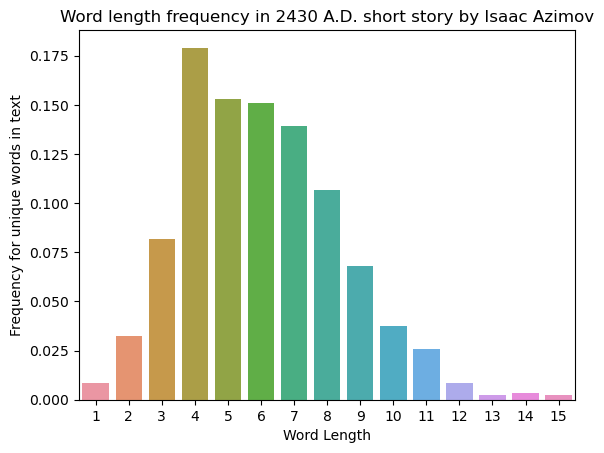

In [72]:
ax = sns.barplot(x = list(length_fract.keys()), y = list(length_fract.values()))
ax.set(xlabel='Word Length', ylabel='Frequency for unique words in text')
plt.title("Word length frequency in 2430 A.D. short story by Isaac Azimov")
plt.show()

# Task 6

При помощи аргумента letter можно менять добавляемую в языке букву

In [207]:
def kirpich(word, letter = 'к'):
    rus_glas = 'ауоыэяюиеё'
    pattern = f'([^{rus_glas}]*?[{rus_glas}])'
    kirp = re.split(pattern, word, flags = re.IGNORECASE)
    kirp_word = []
    for part in kirp:
        vowel = re.findall(f'[{rus_glas}]', part, flags = re.IGNORECASE)
        if vowel != []:
            part = f'{part}{letter}{vowel[0]}'
        if part != '': 
            kirp_word.append(part)
    return ''.join(map(str, kirp_word))

In [226]:
print(kirpich("синхрофазатрон"))
print(kirpich("окно", letter = 'с'))

сикинхрокофаказакатрокон
осокносо


# Task 7

In [270]:
test = "Здесь джва... Здесь, два!!!!!!! Здесь пять, ять' ть ь?!"

In [268]:
def word_count(text, word_amount):
    result = []
    sentences = re.split('[.?!]', text)
    for sentence in sentences:
        words = re.findall('\w+', sentence)
        if len(words) == word_amount:
            result.append(tuple(words))
    return result

In [274]:
word_count(test, 2)

[('Здесь', 'джва'), ('Здесь', 'два')]